# Capstone_Project

### Problem Statement On HR Analytics : How "salary" is varying with respect to other considerable factors.

In [170]:
#importing libraries for data analysis and manipulation

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

%matplotlib inline

import seaborn as sns

from sklearn import preprocessing

In [171]:
#read .csv file from local and assigning it to df DataFrame

df = pd.read_csv("C:/Users/Govardhan_Choletti/Desktop/Data Sets/New_data_Set_Capstone.csv")

df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


### Feature Description : 

In [172]:
#creating copy of data frame df for future purpose(if we lose any data by mistaken we can get data easily).

#we use new data frame df_new for perfoming operations.

df_new = df.copy()

#getting first 10 rows from data frame

df_new.head(10) 

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00000,2035.600000,254.450000,3.77,21226600,3.7500,3.760,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12000,2279.248000,284.906000,3.74,10462800,3.8500,3.680,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65000,2358.660000,294.832500,3.89,18761000,4.2300,4.290,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12000,2450.048000,306.256000,4.35,66130600,4.2600,4.310,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00000,2498.000000,312.250000,4.34,26868200,4.7900,4.410,4.08,18.80,19.05,1,High School or less
5,Male,0,No,Yes,Two year,Yes,No,23,6444.23000,2577.692000,322.211500,4.37,29869600,5.8800,5.040,4.13,18.80,19.1,1,High School or less
6,Male,0,Yes,No,Two year,Yes,No,23,6455.50000,2582.200000,322.775000,4.42,25239200,6.0925,5.590,4.15,18.80,19.1,1,High School or less
7,Female,0,No,Yes,One year,Yes,No,24,6458.35722,2583.342888,322.917861,4.44,28307500,6.1000,5.670,4.21,18.80,19.15,1,Intermediate
8,Female,1,No,Yes,Month-to-month,Yes,Yes,24,6529.23000,2611.692000,326.461500,4.45,24295600,6.1500,6.170,4.27,18.85,19.2,1,Intermediate
9,Male,0,No,Yes,Month-to-month,Yes,No,43,6682.33000,2672.932000,334.116500,4.41,17671600,6.2600,6.095,4.22,18.85,19.2,1,Intermediate


In [173]:
#getting last 10 rows of data frame

df_new.tail(10)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4990,Male,0,No,Yes,Month-to-month,No,No,70,168974.5280,61235.51239,8448.726400,312.500000,317200,NaN,223.960007,307.399994,116.85,8672.45,72,PG
4991,Male,1,No,Yes,Two year,No,No,70,169149.7070,67659.88280,8457.485350,309.660004,443500,NaN,219.080002,302.779999,117.15,8684.8,72,PG
4992,Male,1,No,Yes,One year,No,No,71,170372.5473,68149.01893,8518.627365,312.700012,295300,NaN,238.089996,308.489990,117.20,,72,PG
4993,Male,0,No,Yes,Month-to-month,Yes,Yes,71,170639.5565,68255.82259,8531.977825,314.000000,294600,NaN,237.899994,309.420013,117.45,,72,PG
4994,Male,0,No,Yes,Month-to-month,Yes,No,71,175689.3000,70275.72000,8784.465000,625.861078,7987100,NaN,238.470001,302.048370,117.60,,72,PG
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.8000,72278.72000,9034.840000,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.9000,74274.36000,9284.295000,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.8000,77054.72000,9631.840000,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.7000,78388.28000,9798.535000,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.7400,79988.29600,9998.537000,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [174]:
#for getting size of dataframe

size = df_new.size

#for getting shape of dataframe

shape = df_new.shape

print("Size:",size)

print("Shape:",shape)

Size: 100000
Shape: (5000, 20)


In [175]:
#getting a concise summary of the dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

###### Here we have "Business" as int64 but it is categorical data and "Total_Sales" as categorical data but it is numerical data.So I am Changing these these 2 columns to their respective data types.

In [176]:
df_new['Business'] = df_new['Business'].astype('object')

df_new['Total_Sales'] = pd.to_numeric(df_new['Total_Sales'],errors='coerce')

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   object 
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

### Checking for duplicates : 

In [177]:
duplicate = df_new[df_new.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education


###### We Do not have any duplicate rows.

### Checking for Null Values :

In [178]:
#checking are there any missing values in data set

df_new.isnull().any()

Gender            False
Business          False
Dependancies      False
Calls             False
Type              False
Billing           False
Rating            False
Age               False
Salary            False
Base_pay           True
Bonus             False
Unit_Price        False
Volume            False
openingbalance     True
closingbalance    False
low               False
Unit_Sales        False
Total_Sales        True
Months            False
Education         False
dtype: bool

In [179]:
#How many missing values we have in each column in our dataset

df_new.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

#### Checking Percentage of Null Values :

In [180]:
df_new.isnull().sum() * 100 / len(df_new)

Gender             0.00
Business           0.00
Dependancies       0.00
Calls              0.00
Type               0.00
Billing            0.00
Rating             0.00
Age                0.00
Salary             0.00
Base_pay           0.46
Bonus              0.00
Unit_Price         0.00
Volume             0.00
openingbalance    29.52
closingbalance     0.00
low                0.00
Unit_Sales         0.00
Total_Sales        0.32
Months             0.00
Education          0.00
dtype: float64

## Continous Variables :

### Distribution Of Data - Continous variables :

In [181]:
# Function for plotting displots on continous variables

# Method Definition

def plt_numeric_dist(data,num):
    
    #looping for each variable
    for j,i in enumerate(num):
        
        sns.displot(data[i],kde=True)
        
       

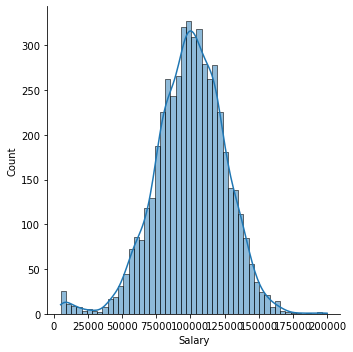

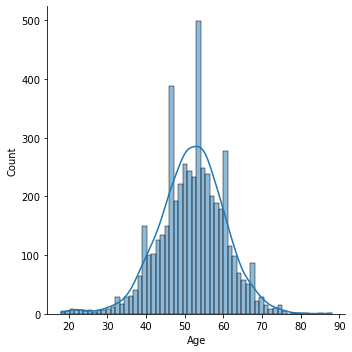

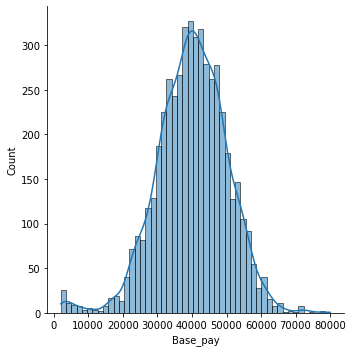

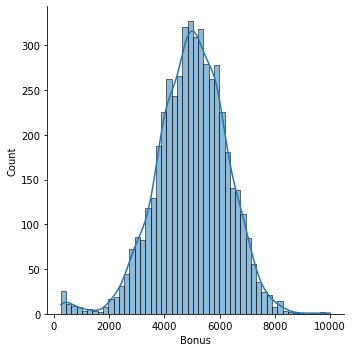

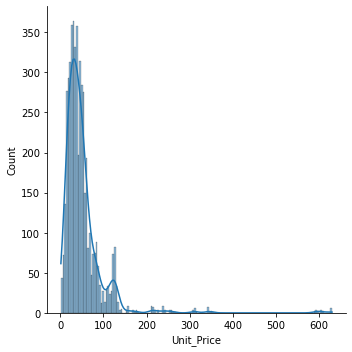

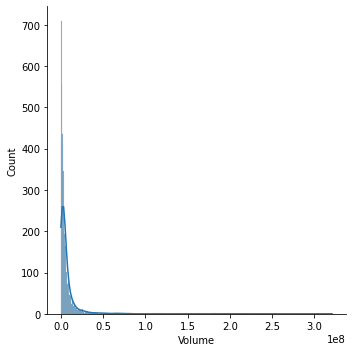

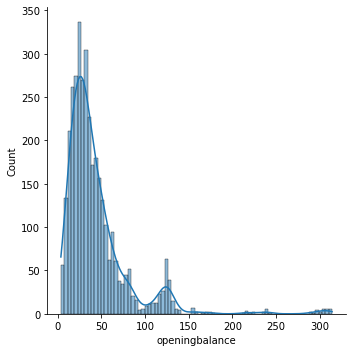

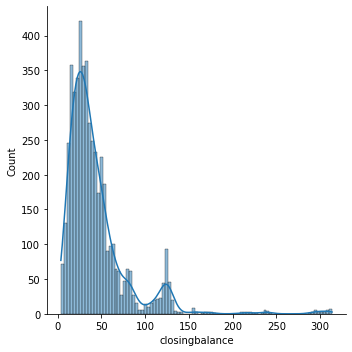

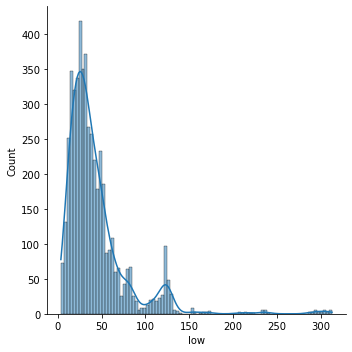

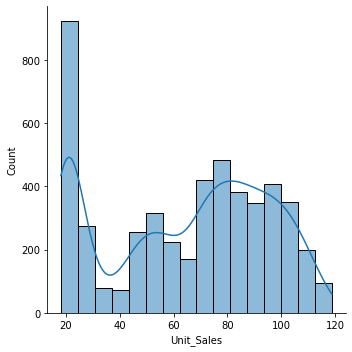

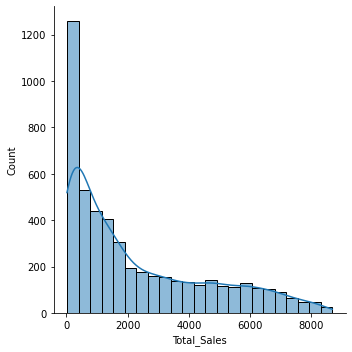

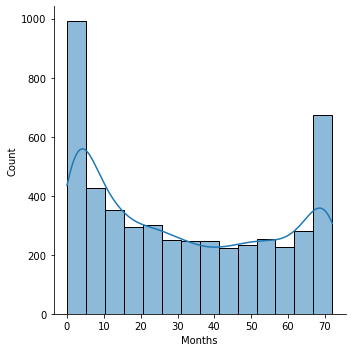

In [183]:
# Numeric/Continous features of our dataset
 
numeric_features = ['Salary','Age','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months']

# Method Calling
plt_numeric_dist(df_new,numeric_features)

##### Based on above plottings we can say that :

###### Salary,Age,Base_pay,Bonus are Normally Distributed.Others are having Skewness.

##### We have Null  Values in Base_pay,openingbalance,Total_Sales . Base_pay is normally distributed so so iam going to replace Base_pay Null values with Mean but openingbalance and Total_Sales are skewed so i am going to replace these null values with median.

### Handling Null Values :

In [184]:
base_pay_mean = df_new['Base_pay'].mean()

df_new['Base_pay'].fillna(base_pay_mean, inplace = True)

opening_bal_median = df_new['openingbalance'].median()

df_new['openingbalance'].fillna(opening_bal_median, inplace = True)

total_sales_median = df_new['Total_Sales'].median()

df_new['Total_Sales'].fillna(total_sales_median, inplace = True)

df_new.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

### Detecting Outliers : 

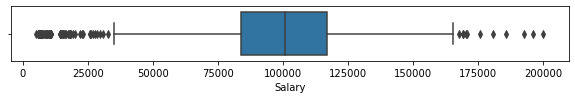

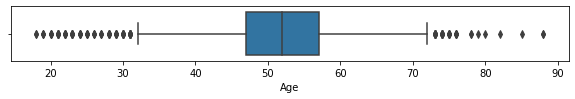

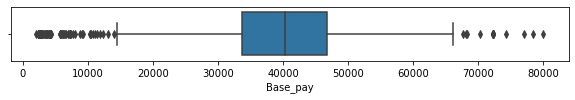

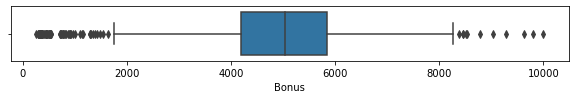

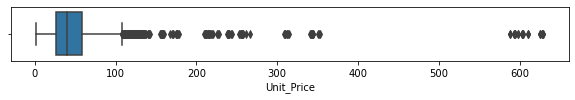

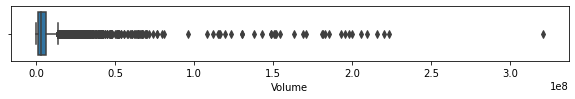

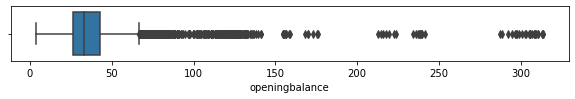

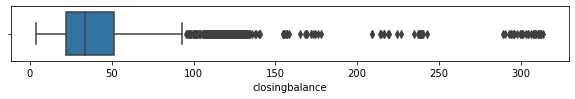

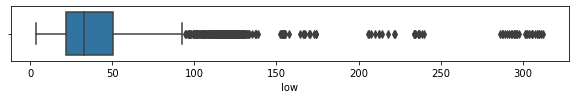

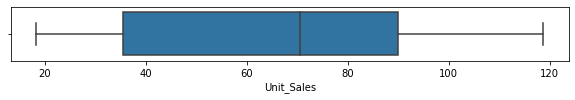

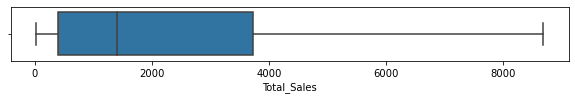

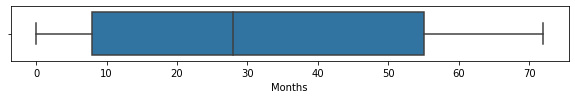

In [185]:
#Plotting every numeric feature with box plot for checking if any outliers exists or not 

for column in numeric_features:
    
    plt.figure(figsize=(10,1))
    
    sns.boxplot(x=df_new[column])
    

##### Here we have outliers in Salary,Age,Base_pay,Bonus,Unit_price,Volume,openingbalance,closingbalance,Low. So we need to handle these outliers.

#### Here to handle outliers i am using "Quantile based flooring and capping".In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

#### If i remove outliers it is affecting "Education" column so i am going to replace outliers using "Quantile based flooring and capping".

In [186]:
# keeping all outliers features names in list with a name "outliers_num_features"

outliers_num_features = ['Salary','Age','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low']

for column in outliers_num_features:
    
    # Computing 10th, 90th percentiles and replacing the outliers
    
    tenth_percentile = np.percentile(df_new[column], 10)
    
    ninetieth_percentile = np.percentile(df_new[column], 90)
    
    df_new[column] = np.where(df_new[column]<tenth_percentile, tenth_percentile, df_new[column])
    
    df_new[column] = np.where(df_new[column]>ninetieth_percentile, ninetieth_percentile, df_new[column])

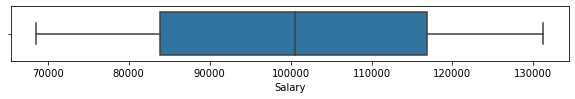

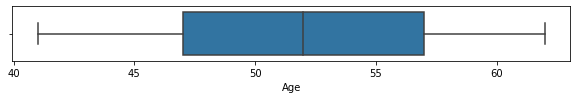

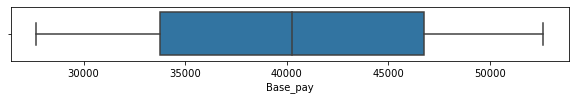

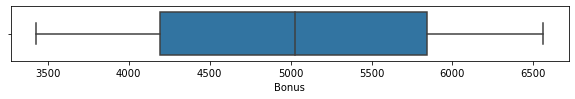

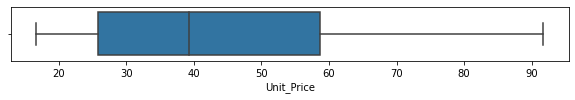

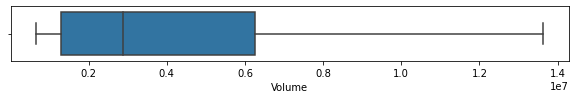

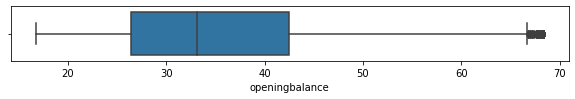

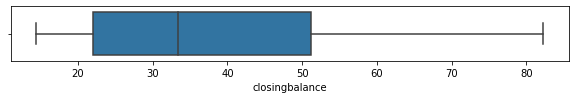

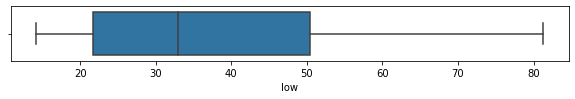

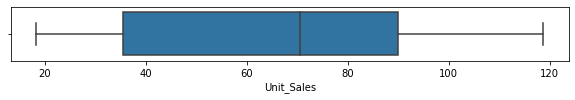

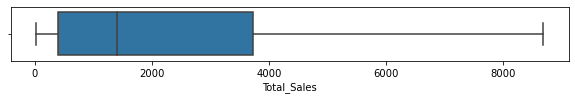

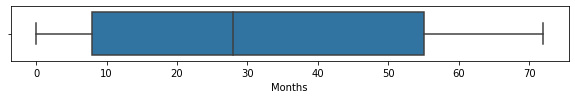

In [187]:
#Checking for outliers whether they are removed or not by plotting numeric fatures again with box plot

for column in numeric_features:
    
    plt.figure(figsize=(10,1))
    
    sns.boxplot(x=df_new[column])

#### Now we successfully removed Outliers.

### Finding Correlation for Continous Variables using "Spearman Rank Correlation" :

#### Our data is not normally distributed so we have to use "Spearman Rank Correlation" for finding Correlation between Variables.

In [188]:
corr = df_new.corr(method='spearman', min_periods=1)

corr

,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Age,1.000000,0.189866,0.180101,0.189866,0.120336,-0.036976,0.075442,0.449470,0.189632,0.200737,0.194856,0.222156
Salary,0.189866,1.000000,0.994401,1.000000,0.811171,-0.391796,0.160736,0.338386,0.999803,0.998997,0.995510,0.599362
Base_pay,0.180101,0.994401,1.000000,0.994401,0.808242,-0.390576,0.151367,0.331424,0.994251,0.992931,0.989458,0.592668
Bonus,0.189866,1.000000,0.994401,1.000000,0.811171,-0.391796,0.160736,0.338386,0.999803,0.998997,0.995510,0.599362
Unit_Price,0.120336,0.811171,0.808242,0.811171,1.000000,-0.324169,0.092270,0.256234,0.811794,0.810679,0.807170,0.546396
Volume,-0.036976,-0.391796,-0.390576,-0.391796,-0.324169,1.000000,-0.007888,-0.145645,-0.393546,-0.390955,-0.391128,-0.261688
openingbalance,0.075442,0.160736,0.151367,0.160736,0.092270,-0.007888,1.000000,0.256716,0.160722,0.171617,0.170206,-0.054113
closingbalance,0.449470,0.338386,0.331424,0.338386,0.256234,-0.145645,0.256716,1.000000,0.338177,0.346500,0.341984,0.367504
low,0.189632,0.999803,0.994251,0.999803,0.811794,-0.393546,0.160722,0.338177,1.000000,0.998859,0.995371,0.599327
Unit_Sales,0.200737,0.998997,0.992931,0.998997,0.810679,-0.390955,0.171617,0.346500,0.998859,1.000000,0.995918,0.603779


<AxesSubplot:>

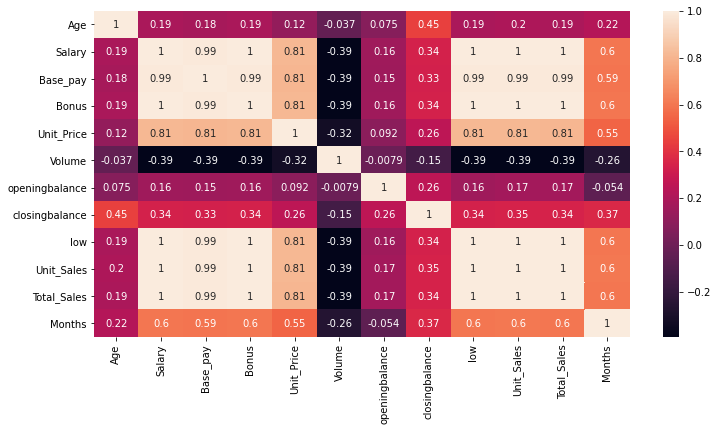

In [189]:
plt.figure(figsize=(12,6))

sns.heatmap(corr, annot=True)

#### Based on above heat map and corr()  of Spearman method we can conclude that :

#### Salary has Stronger  Relationship with :

Base_pay

Bonus

Unit_Price

low

Unit_Sales

Total_Sales

#### Moderate Relationship with below features :

Months

## Categorical variables :

### Distribution Of Data - Categorical variables :

In [190]:
#Categorical features

categoric_features = ['Gender','Business','Dependancies','Calls','Type','Billing','Rating','Education']

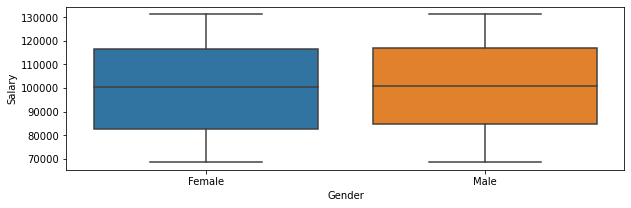

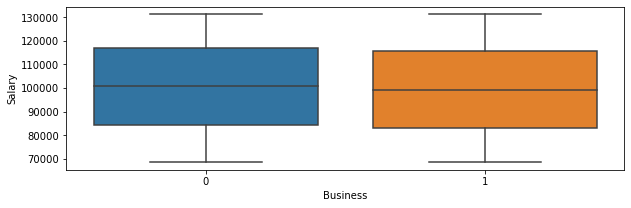

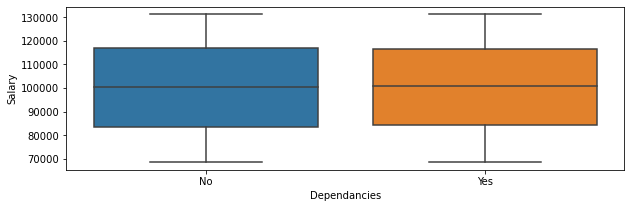

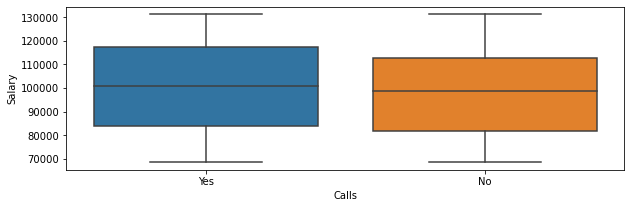

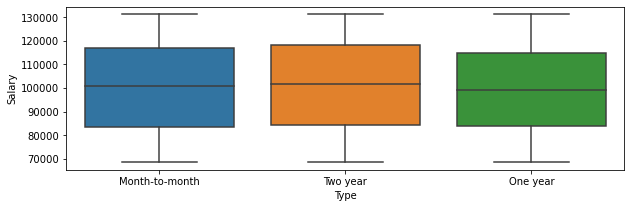

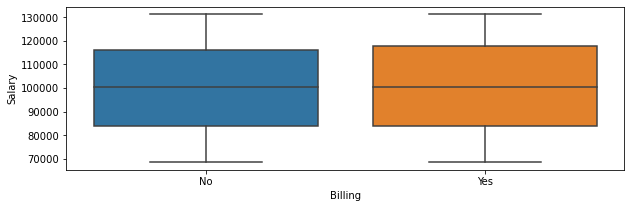

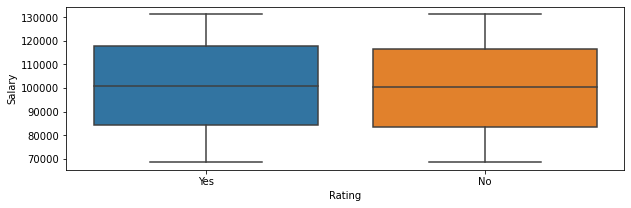

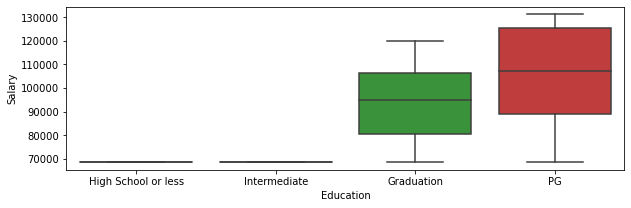

In [191]:
#Plotting every categorical feature is sarying based on salary with box plot

for column in categoric_features:
    
    plt.figure(figsize=(10,3))
    
    sns.boxplot(x=df_new[column],y=df_new['Salary'])
    

#### "Salary" is varying only with "Education" based on above box plots.So "Salary" is highly correlated with "Education".

### Encoding Categorical Data : 

In [192]:
# Encoding Education using get_dummies

df_new = pd.get_dummies(df_new, columns=['Education'], drop_first=True)

In [193]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         5000 non-null   object 
 1   Business                       5000 non-null   object 
 2   Dependancies                   5000 non-null   object 
 3   Calls                          5000 non-null   object 
 4   Type                           5000 non-null   object 
 5   Billing                        5000 non-null   object 
 6   Rating                         5000 non-null   object 
 7   Age                            5000 non-null   float64
 8   Salary                         5000 non-null   float64
 9   Base_pay                       5000 non-null   float64
 10  Bonus                          5000 non-null   float64
 11  Unit_Price                     5000 non-null   float64
 12  Volume                         5000 non-null   f

In [194]:
#Removing unwanted columns based on above EDA steps

#df_new1 is new dataframe with features those are strong or moderate correlation with salary 

df_new1 = df_new.drop(['Gender', 'Business','Dependancies','Calls','Type','Billing','Rating','Age','Volume','openingbalance','closingbalance'], axis = 1)

df_new1.head()


,Salary,Base_pay,Bonus,Unit_Price,low,Unit_Sales,Total_Sales,Months,Education_High School or less,Education_Intermediate,Education_PG
0,68550.37362,27657.468574,3427.518681,16.626999,14.149,18.25,18.80,0,1,0,0
1,68550.37362,27657.468574,3427.518681,16.626999,14.149,18.40,18.85,0,1,0,0
2,68550.37362,27657.468574,3427.518681,16.626999,14.149,18.70,18.90,0,1,0,0
3,68550.37362,27657.468574,3427.518681,16.626999,14.149,18.75,19.00,0,1,0,0
4,68550.37362,27657.468574,3427.518681,16.626999,14.149,18.80,19.05,1,1,0,0


In [195]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Salary                         5000 non-null   float64
 1   Base_pay                       5000 non-null   float64
 2   Bonus                          5000 non-null   float64
 3   Unit_Price                     5000 non-null   float64
 4   low                            5000 non-null   float64
 5   Unit_Sales                     5000 non-null   float64
 6   Total_Sales                    5000 non-null   float64
 7   Months                         5000 non-null   int64  
 8   Education_High School or less  5000 non-null   uint8  
 9   Education_Intermediate         5000 non-null   uint8  
 10  Education_PG                   5000 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 327.3 KB


### Machine Learning : 

#### Splitting Dataset into 2 types :  independent and target.

In [196]:
# X will contain all the features and y will contain the target variable

# X will contain all features except Salary , Y will contain only Salary

print(df_new1)

# X is dataset without Salary

X = df_new1.drop('Salary',axis = 1).values

# y is target varible i.e., Salary.

y = df_new1['Salary'].values

print(X)

print(y)


            Salary      Base_pay        Bonus  Unit_Price        low  \
0      68550.37362  27657.468574  3427.518681   16.626999  14.149000   
1      68550.37362  27657.468574  3427.518681   16.626999  14.149000   
2      68550.37362  27657.468574  3427.518681   16.626999  14.149000   
3      68550.37362  27657.468574  3427.518681   16.626999  14.149000   
4      68550.37362  27657.468574  3427.518681   16.626999  14.149000   
...            ...           ...          ...         ...        ...   
4995  131232.04457  52628.605344  6561.602229   91.727001  81.302001   
4996  131232.04457  52628.605344  6561.602229   91.727001  81.302001   
4997  131232.04457  52628.605344  6561.602229   91.727001  81.302001   
4998  131232.04457  52628.605344  6561.602229   91.727001  81.302001   
4999  131232.04457  52628.605344  6561.602229   91.727001  81.302001   

      Unit_Sales  Total_Sales  Months  Education_High School or less  \
0          18.25        18.80       0                          

#### Splitting X and y into test and train sets :

In [197]:
# importing library train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split

# Splitting data into test and train

# We will use train_test_split from sklearn.model_selection to split our data.

# 70% of the data will be training data and %30 will be testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


### Applying ML Algorithms :

#### Linear Regression :

In [198]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

linreg = LinearRegression()

linreg.fit(X_train, y_train)

linpred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linpred, squared=False)

rmse = np.sqrt(mse)

r2_scr = r2_score(y_test, linpred)

print("mse:",mse)
print("rmse:",rmse)
print("r2_score:",r2_scr)

mse: 3.3973567096880557e-06
rmse: 0.0018431919893727988
r2_score: 1.0


#### DecisionTree :

In [199]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=False)

rmse = np.sqrt(mse)

r2_scr = r2_score(y_test, y_pred)

print("mse:",mse)
print("rmse:",rmse)
print("r2_score:",r2_scr)

mse: 30.828137003339872
rmse: 5.55230915956054
r2_score: 0.9999976222590972


#### RandomForest :

In [200]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 20)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

Y_pred1 = regressor.predict(X_test)

mse1 = mean_squared_error(y_test, Y_pred1, squared=False)

rmse1 = np.sqrt(mse1)

r2_scr1 = r2_score(y_test, Y_pred1)

print("mse:",mse1)
print("rmse:",rmse1)
print("r2_score:",r2_scr1)


mse: 21.743112215068432
rmse: 4.662951020016019
r2_score: 0.9999988171943716


#### Based on MSE,RMSE and r2_Score, we can say that Linear Regression model is overfitted because r2_score = 1.So we can go with either Random forest Regressor or Decision Tree Regressor.